In [ ]:
!pip install --upgrade scikit-learn

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# Load your dataset (replace 'extracted_features.csv' with the actual file path)
# Assuming your dataset has a 'type' column for binary classification
df = pd.read_csv('extracted_features.csv')

In [42]:
# Assuming df is your DataFrame
X = df.drop(columns=['url', 'type'])  # Features
y = df['type']  # Target variable

# Preprocessing: Standard Scaling for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

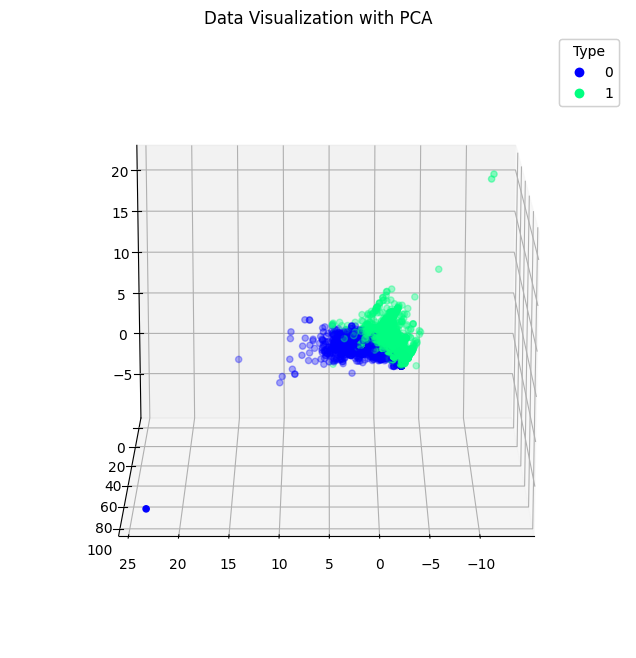

In [159]:
# Plot the data points in 3D with adjusted viewing angle
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='winter')
ax.set_title('Data Visualization with PCA')

# Adjust viewing angle
ax.view_init(elev=15, azim=90)  # Change the elevation (vertical) and azimuth (horizontal) angles

# Create legend
legend = ax.legend(*scatter.legend_elements(), title='Type', loc='upper right')
ax.add_artist(legend)

plt.show()

# SVM

In [43]:
# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine Results:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       720
           1       0.98      0.94      0.96       624

    accuracy                           0.96      1344
   macro avg       0.97      0.96      0.96      1344
weighted avg       0.96      0.96      0.96      1344

Accuracy: 0.9635416666666666


## Confusion Matrix


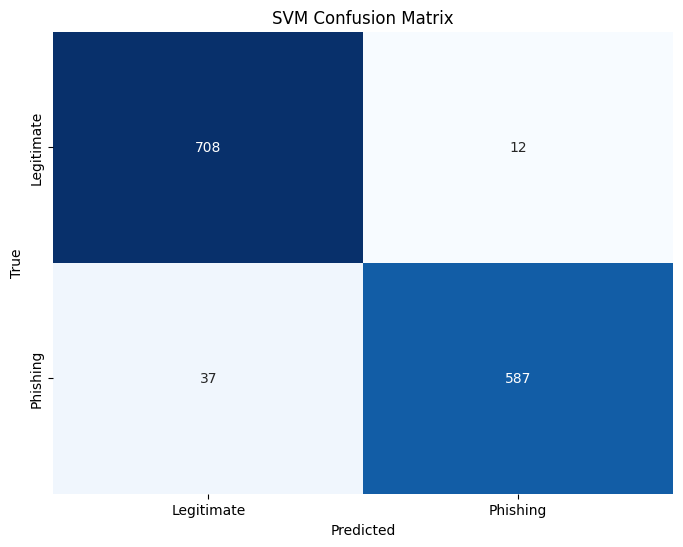

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'], cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Receiver Operating Characteristics (ROC)

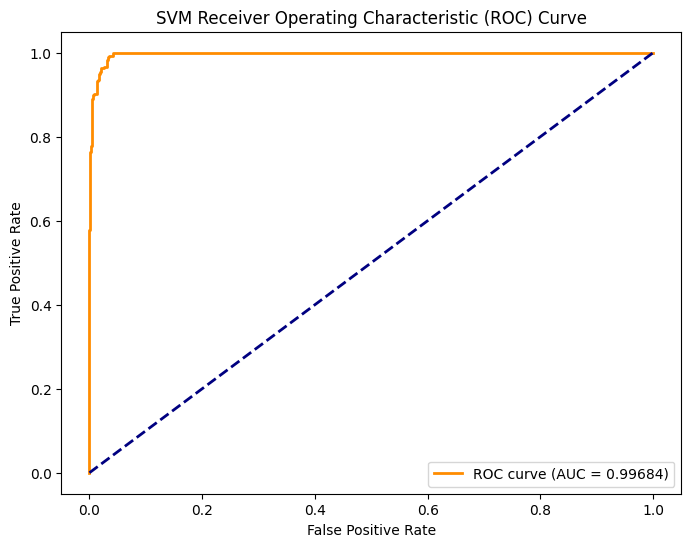

In [20]:
# Get the decision function scores
svm_scores = svm_model.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, svm_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Precision-Recall

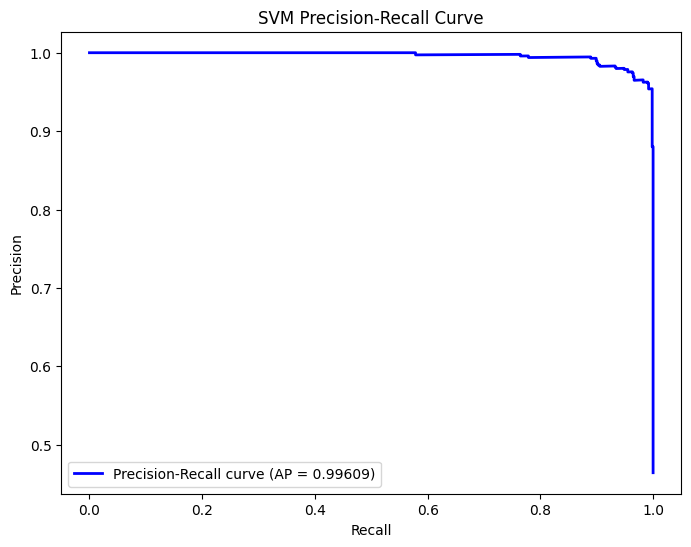

In [21]:
# Get the decision function scores
svm_scores = svm_model.decision_function(X_test)

# Convert decision function scores to probabilities using sigmoid
svm_probabilities = 1 / (1 + np.exp(-svm_scores))

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = {:.5f})'.format(average_precision_score(y_test, svm_probabilities)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.legend()
plt.show()

# Neural Networks

In [71]:
# Build a simple neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Display metrics
print("Neural Network Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/10
168/168 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8749 - val_loss: 0.1876 - val_accuracy: 0.9360
Epoch 2/10
168/168 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9542 - val_loss: 0.1221 - val_accuracy: 0.9598
Epoch 3/10
168/168 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9605 - val_loss: 0.1003 - val_accuracy: 0.9635
Epoch 4/10
168/168 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9676 - val_loss: 0.0889 - val_accuracy: 0.9658
Epoch 5/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0753 - accuracy: 0.9726 - val_loss: 0.0752 - val_accuracy: 0.9680
Epoch 6/10
168/168 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9790 - val_loss: 0.0698 - val_accuracy: 0.9762
Epoch 7/10
168/168 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0642 - val_accuracy: 0.9717
Epoch 

## Confusion Matrix

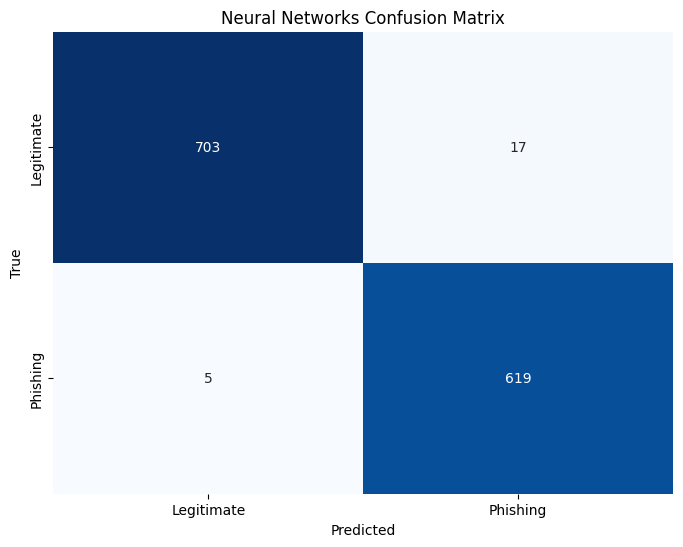

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'], cbar=False)
plt.title('Neural Networks Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Receiver Operating Characteristics (ROC)

42/42 [==============================] - 0s 3ms/step


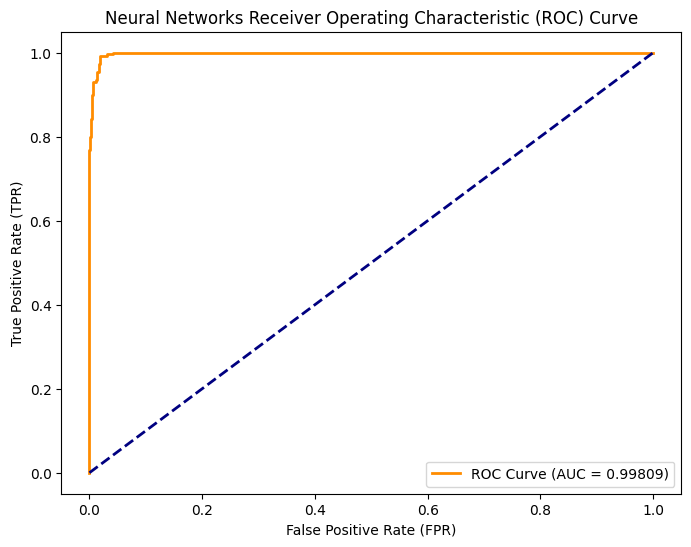

In [27]:
# Get predicted probabilities for positive class (Phishing)
y_probabilities_nn = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities_nn)

# Calculate AUC for ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Neural Networks Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Precision-Recall

42/42 [==============================] - 0s 5ms/step


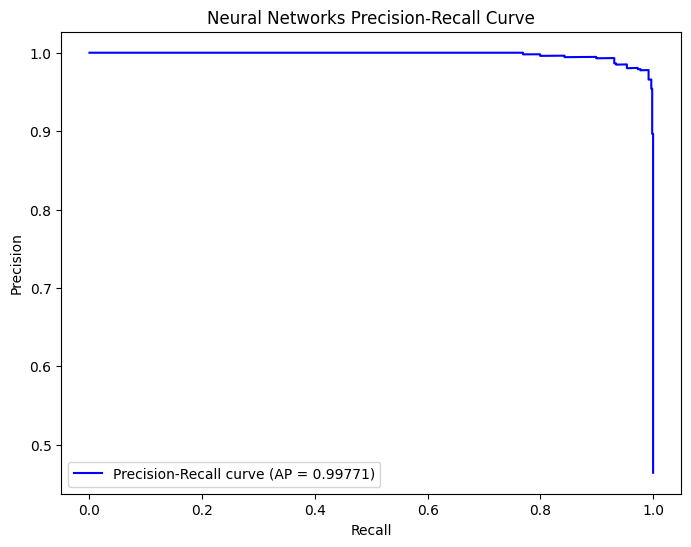

In [29]:
# Get predicted probabilities for positive class (Phishing)
y_probabilities_nn = model.predict(X_test)

# Compute Precision-Recall curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_probabilities_nn)
average_precision_nn = average_precision_score(y_test, y_probabilities_nn)

# Plot Precision-Recall curve for Neural Network
plt.figure(figsize=(8, 6))
plt.plot(recall_nn, precision_nn, color='blue', label=f'Precision-Recall curve (AP = {average_precision_nn:.5f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Neural Networks Precision-Recall Curve')
plt.legend()
plt.show()

# Random Forest

In [12]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       720
           1       0.98      0.99      0.99       624

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344

Accuracy: 0.9866071428571429


## Confusion Matrix

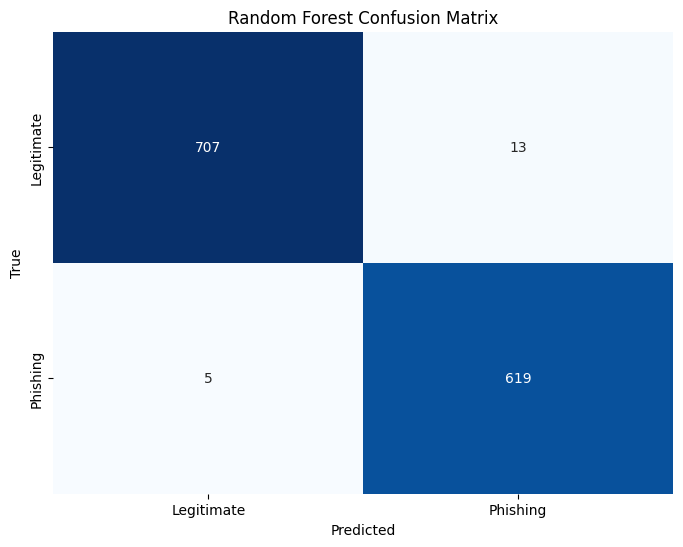

In [13]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'], cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Receiver Operating Characteristics (ROC)

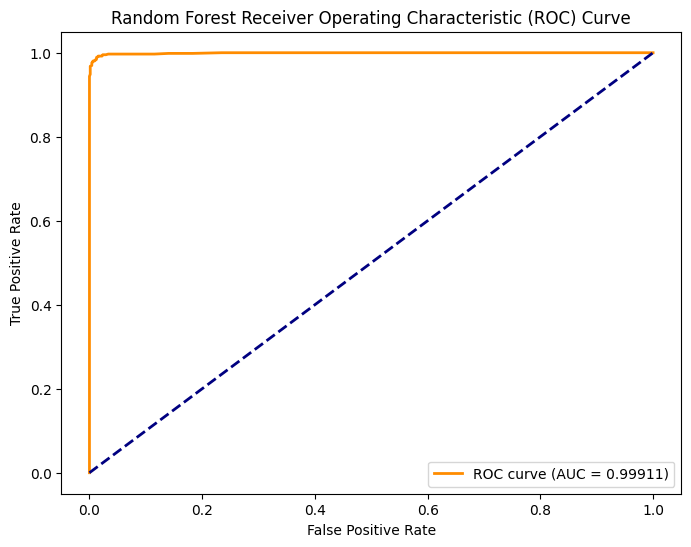

In [30]:
# Get the predicted probabilities for the positive class
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Precision-Recall

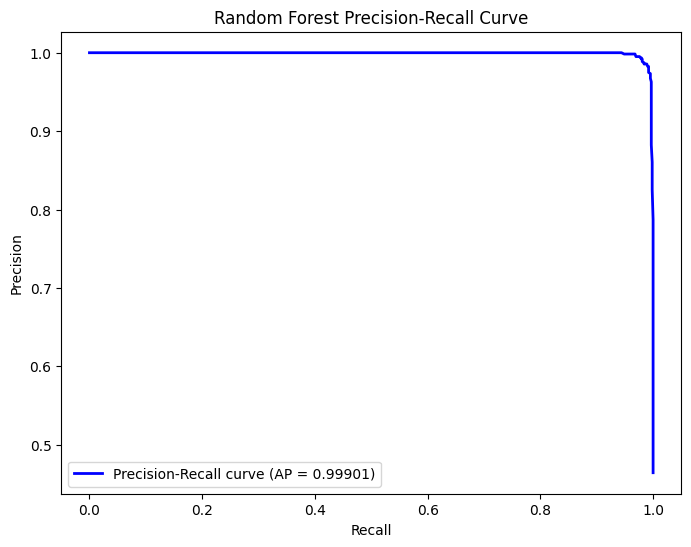

In [31]:
# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probabilities)
average_precision_rf = average_precision_score(y_test, rf_probabilities)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision_rf:.5f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.show()